# Installing Necessory Packages

In [1]:
!pip install xgboost

## Importing necessory libraries

In [58]:
# Dataframe manipulation and analysis libraries
import pandas as pd 
import numpy as np

#Data visualisation libaries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci 

#Library to filter warnings
import warnings
warnings.filterwarnings('ignore')

#Multicolinearity test package
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Preparation libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

# Feature Decomposition Library
from sklearn.decomposition import PCA

#Feature Selection Libraries
from sklearn.feature_selection import RFE

# Model evalualation libraries
from sklearn.metrics import r2_score,mean_squared_error

# Machine Learning Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
import xgboost

#Clustering Libraries
from sklearn.cluster import KMeans

#Learning Curve Analysis Library
from sklearn.model_selection import learning_curve

In [3]:
df = pd.read_excel('Capstone Project.xlsx')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Problem statement

* Build a machine Learning model which can predict the strength of mixture for given ingrediant like cement,slaf,ash,water,superplastic,coarseagg,fineagg,age.

## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Analysis: 
- There are 1030 rows in the dataset
- There are 9 fatures
- There are no null records
- All value are in the form of continous data

### Descriptive Analysis

In [5]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Observation:
- Cement, slag,ash,age tend to have outlier because mean and median are not same.
- for slag,ash and superplastic there is no chance of outliers at lower whisker region as min and Q1 values are same
- Cement,slag,ash,superplastic and age might have outlier at upper/higher whisker region.

### Building Custom Summery function for indepth EDA report

In [6]:
def custom_summary(mydf):
    cols = []
    for i in df.columns:
        if mydf[i].dtype != object:
            cols.append(i)
    result = pd.DataFrame(columns = cols,index=['datatype','count','min','Q1','Q2','Q3','Max','Mean','stddev','skew','kurt','range','IQR','skew_comment','kurt_comment','outlier_comment'])
    for i in result.columns:
        result.loc['datatype',i] = mydf[i].dtype
        result.loc['count',i] = mydf[i].count()
        result.loc['min',i] = mydf[i].min()
        result.loc['Q1',i] = mydf[i].quantile(0.25)
        result.loc['Q2',i] = mydf[i].quantile(0.50)
        result.loc['Q3',i] = mydf[i].quantile(0.75)
        result.loc['Max',i] = mydf[i].quantile(1)
        result.loc['Mean',i] = round(mydf[i].mean(),2)
        result.loc['stddev',i] = round(mydf[i].std(),2)
        result.loc['skew',i] = round(mydf[i].skew(),2)
        result.loc['kurt',i] = round(mydf[i].kurt(),2)
        result.loc['range',i] = mydf[i].quantile(1)-mydf[i].min()
        result.loc['IQR',i] = mydf[i].quantile(0.75)-mydf[i].quantile(0.25)
        
        #Adding Comments for skewness
        if result.loc['skew',i] < -1:
            sk_label = 'Highly negatively skewed'
        elif -1 < result.loc['skew',i] <= -0.5:
            sk_label = 'Moderately negatively skewed'
        elif -0.5 < result.loc['skew',i] <= 0:
            sk_label = 'Approximately normally distributed(-ve)'
        elif 0 < result.loc['skew',i] <= 0.5:
            sk_label = 'Approximately normally distributed(+ve)'
        elif 0.5 < result.loc['skew',i] <= 1:
            sk_label = 'Moderately Positively Skewd'
        elif result.loc['skew',i] > 1:
            sk_label = 'Highly Positively Skewd'
        else:
            sk_label = 'error'
        result.loc['skew_comment',i] = sk_label
        
        #Adding Comments for Kurtosis
        if result.loc['kurt',i] < -1:
            ku_label = 'Highly Platykurtic'
        elif -1 < result.loc['kurt',i] <= -0.5:
            ku_label = 'Moderately Platykurtic'
        elif -0.5 < result.loc['kurt',i] <= 0.5:
            ku_label = 'Mesokurtic'
        elif 0.5 < result.loc['kurt',i] <= 1:
            ku_label = 'Moderately Leptokurtic'
        elif result.loc['kurt',i] > 1:
            ku_label = 'Highly Leptokurtic'
        else:
            ku_label = 'error'
        result.loc['kurt_comment',i] = ku_label
        
        #adding comments for outliers
        LW = result.loc['Q1',i] - (1.5*result.loc['IQR',i])
        UW = result.loc['Q3',i] + (1.5*result.loc['IQR',i])
        
        if len([x for x in mydf[i] if x < LW or x> UW]) > 0:
            outlier_lable = "Have Outliers"
        else:
            outlier_lable = "No Outliers"
            
        result.loc['outlier_comment',i] = outlier_lable
        
    return result
            

In [7]:
custom_summary(df)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
datatype,float64,float64,float64,float64,float64,float64,float64,int64,float64
count,1030,1030,1030,1030,1030,1030,1030,1030,1030
min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1,2.33
Q1,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0,23.71
Q2,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0,34.445
Q3,350.0,142.95,118.3,192.0,10.2,1029.4,824.0,56.0,46.135
Max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0,82.6
Mean,281.17,73.9,54.19,181.57,6.2,972.92,773.58,45.66,35.82
stddev,104.51,86.28,64.0,21.35,5.97,77.75,80.18,63.17,16.71
skew,0.51,0.8,0.54,0.07,0.91,-0.04,-0.25,3.27,0.42


Analysis 
- we have outlier in slag,water,superplastic,finagg,age,strength

## Checking for Outlier using boxplot

In [8]:
def replace_outlier(mydf,col,method = 'Quartile', stratergy = 'median'):
    if method == 'Quartile':
        Q1 = mydf[col].quantile(0.25)
        Q2 = mydf[col].quantile(0.50)
        Q3 = mydf[col].quantile(0.75)
        IQR = Q3 - Q1
        LW = Q1 - (1.5 * IQR)
        UW = Q3 + (1.5 * IQR)
    elif method == 'std':
        mean = mydf[col].mean()
        std = mydf[col].std()
        LW = mean - (2 * std)
        UW = mean + (2 * std)
    else:
        print('Pass a corect method')
#printing all the outliers 
    outliers = mydf.loc[(mydf[col] < LW) | (mydf[col] > UW),col]
    outliers_density = round(len(outliers) / len(mydf),2)
    if len(outliers) == 0:
        print(f'feature {col} does not have any outliers')
    else:
        print(f'feature {col} has otliers')
        print(f'total no of outliers in {col} is {len(outliers)}')
        print(f'outliers percentage in {col} is {outliers_density*100}%')
    
    if stratergy == 'median':
#     mydf.loc[(mydf[col] < LW), col] = Q2 
#     mydf.loc[(mydf[col] > UW), col] = Q2 
        mydf.loc[(mydf[col] < LW), col] = Q1 
        mydf.loc[(mydf[col] > UW), col] = Q3 
    elif stratergy == 'mean':
        mydf.loc[(mydf[col] < LW), col] = mean 
        mydf.loc[(mydf[col] > UW), col] = mean
    else:
        print('pass the correct stratergy')
        
    return mydf

In [9]:
def odt_plots(mydf,col):
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
    #discriptive statistics box plot
    sns.boxplot(mydf[col],ax = ax1)
    ax1.set_title(col + ' boxplot')
    ax1.set_xlabel('values')
    ax1.set_ylabel('boxplot')
    #replacing the outliers
    mydf_out = replace_outlier(mydf,col)
    #plotting box plot without outliers
    sns.boxplot(mydf_out[col],ax = ax2)
    ax2.set_title(col + ' boxplot')
    ax2.set_xlabel('values')
    ax2.set_ylabel('boxplot')
    plt.show()

feature cement does not have any outliers


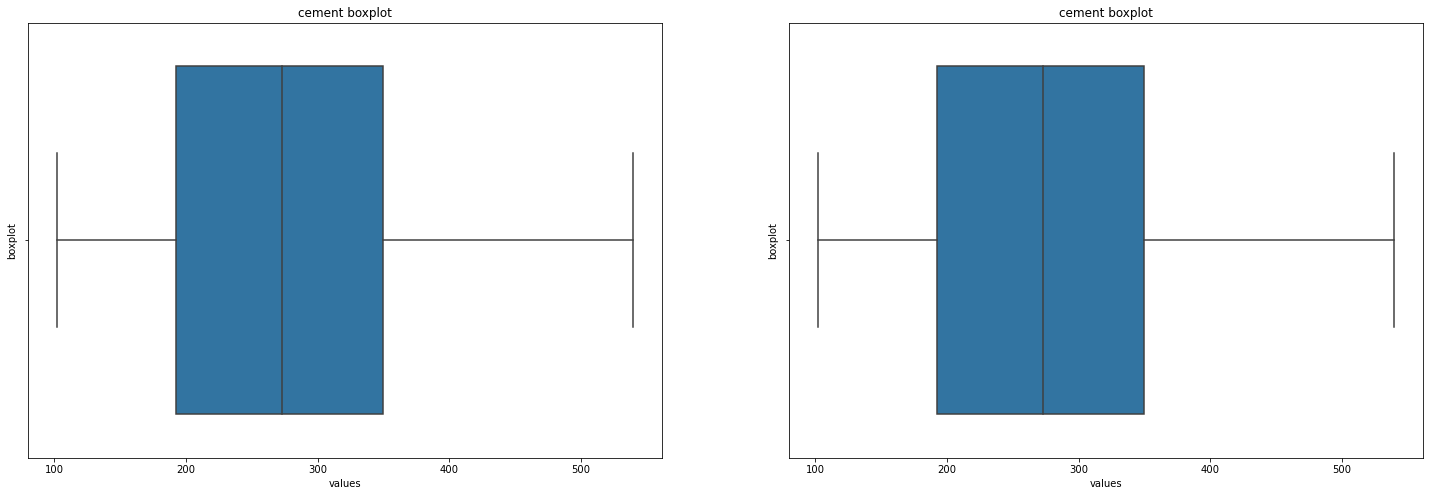

feature slag has otliers
total no of outliers in slag is 2
outliers percentage in slag is 0.0%


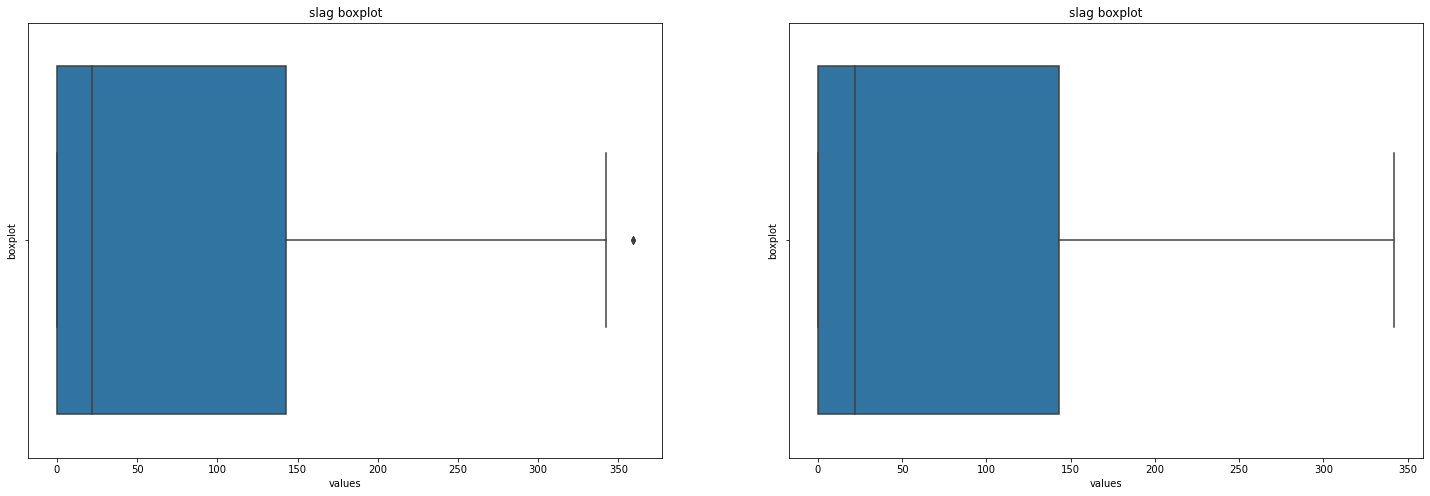

feature ash does not have any outliers


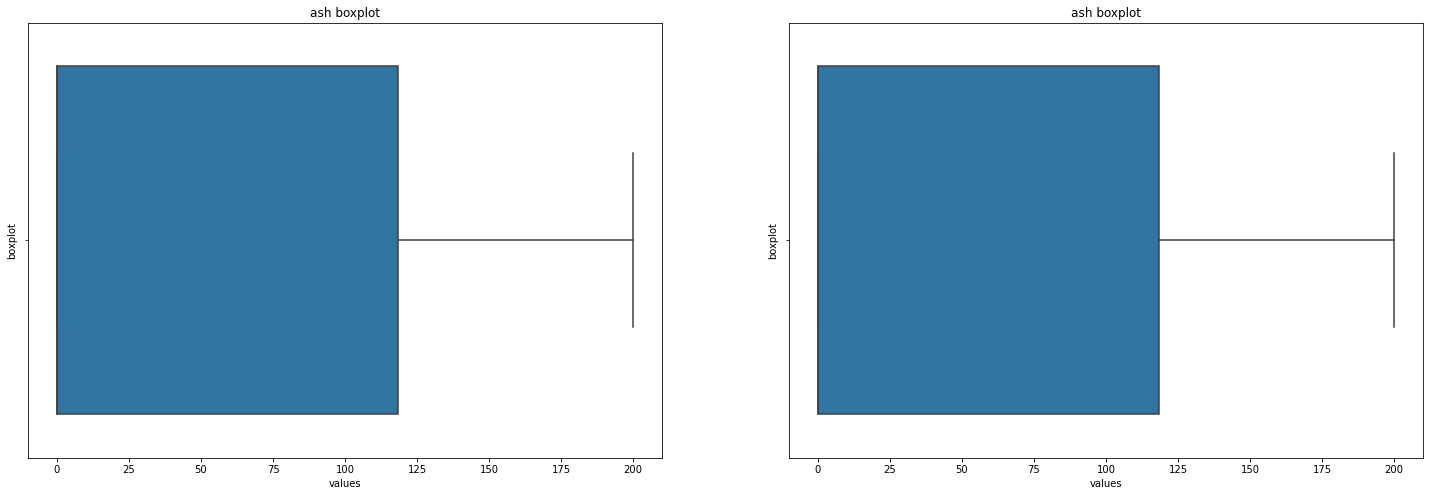

feature water has otliers
total no of outliers in water is 9
outliers percentage in water is 1.0%


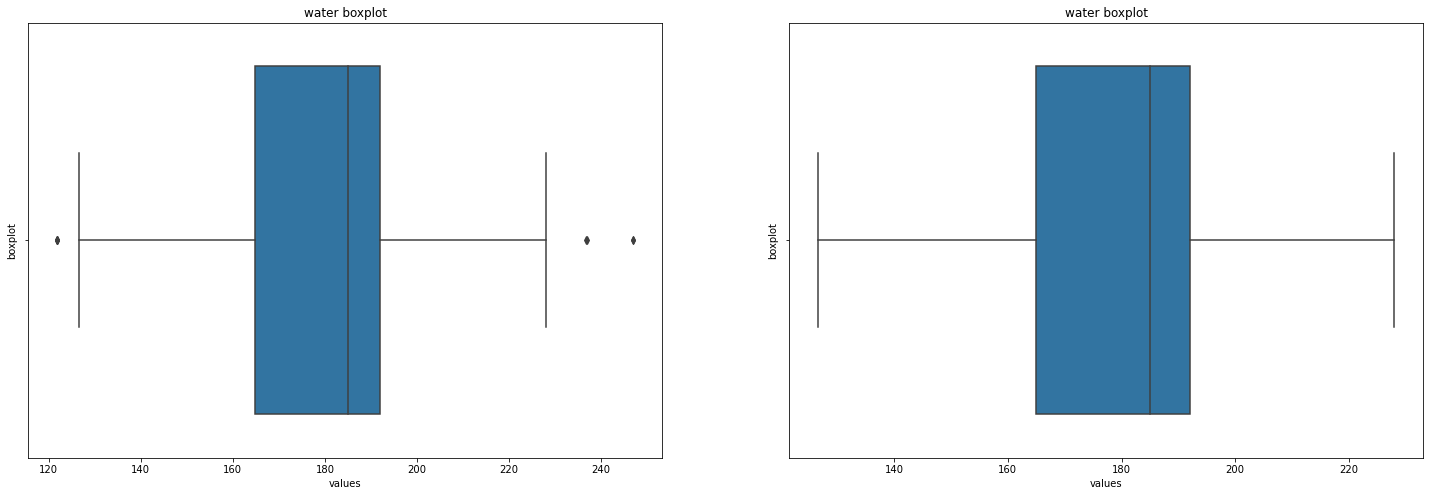

feature superplastic has otliers
total no of outliers in superplastic is 10
outliers percentage in superplastic is 1.0%


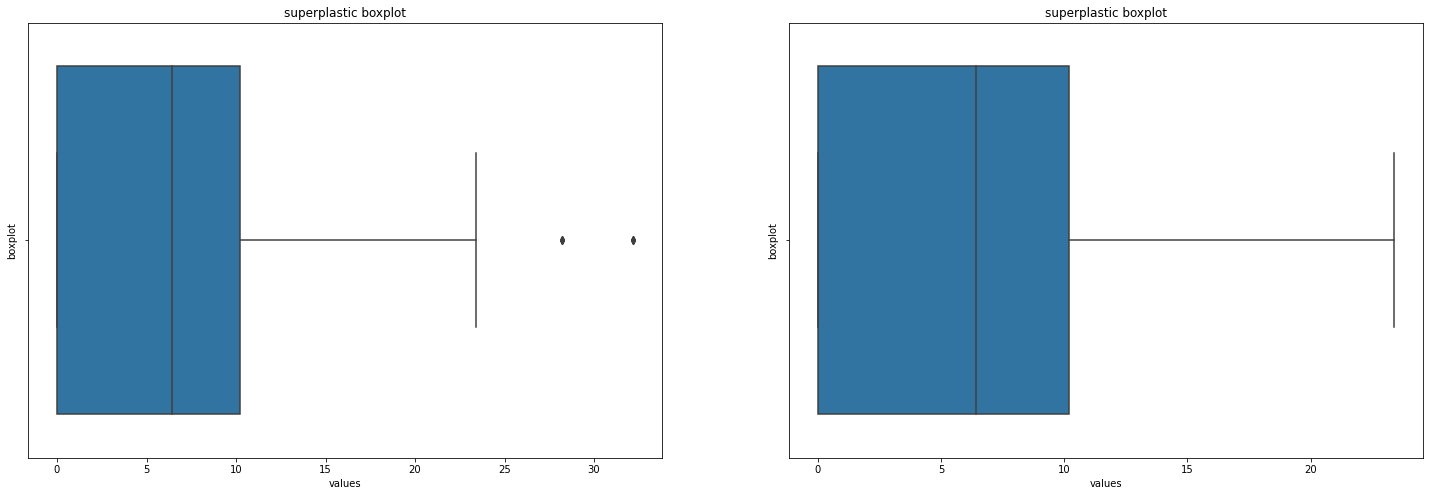

feature coarseagg does not have any outliers


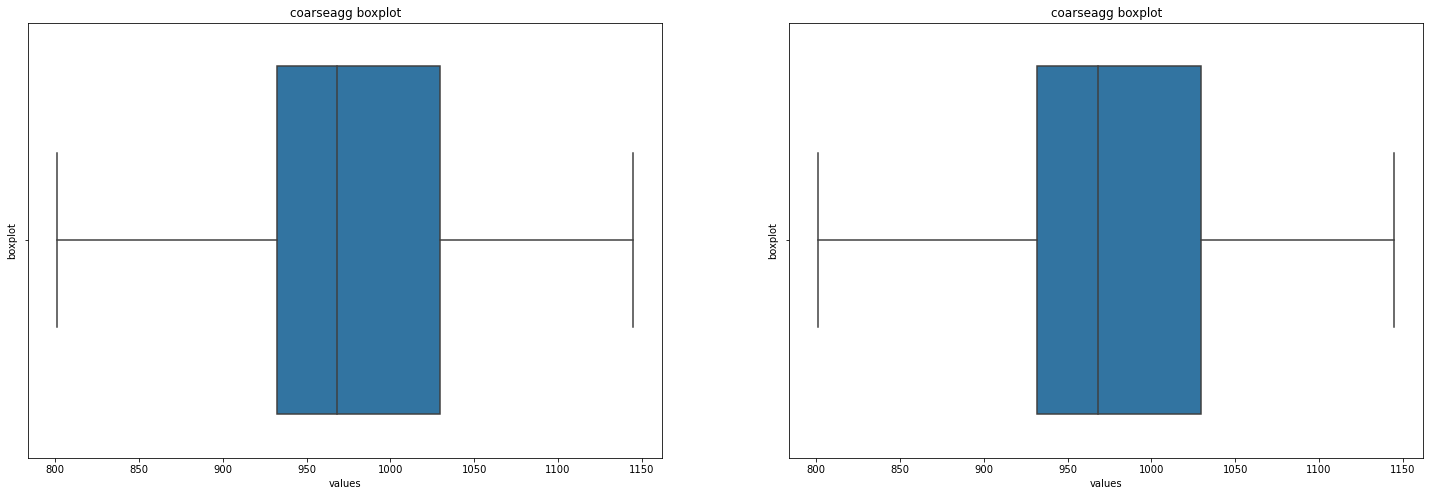

feature fineagg has otliers
total no of outliers in fineagg is 5
outliers percentage in fineagg is 0.0%


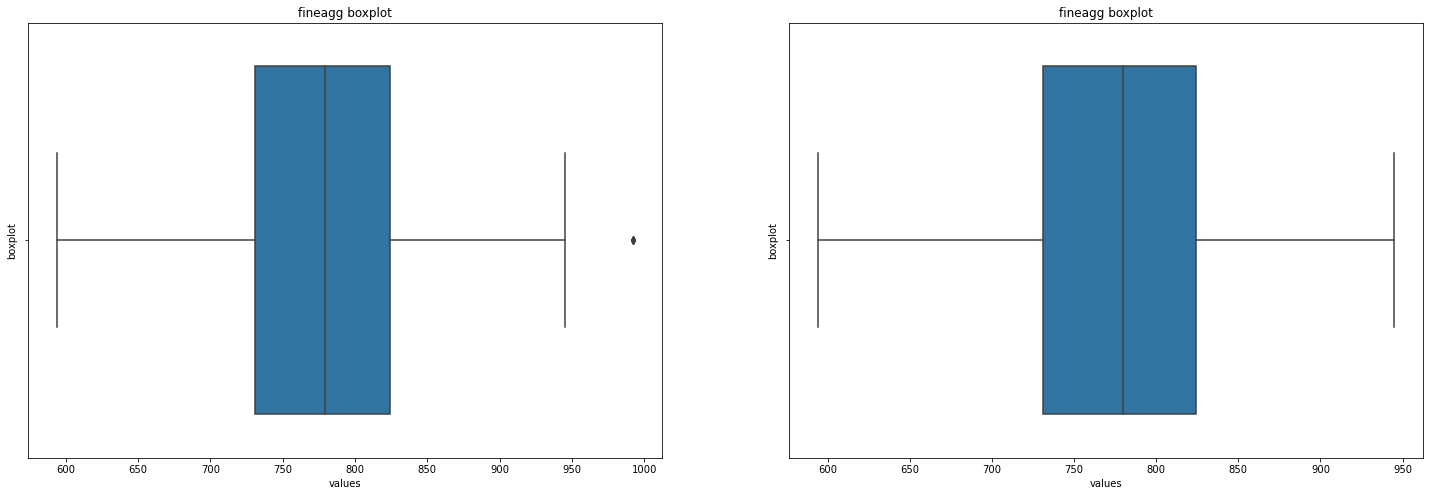

feature age has otliers
total no of outliers in age is 59
outliers percentage in age is 6.0%


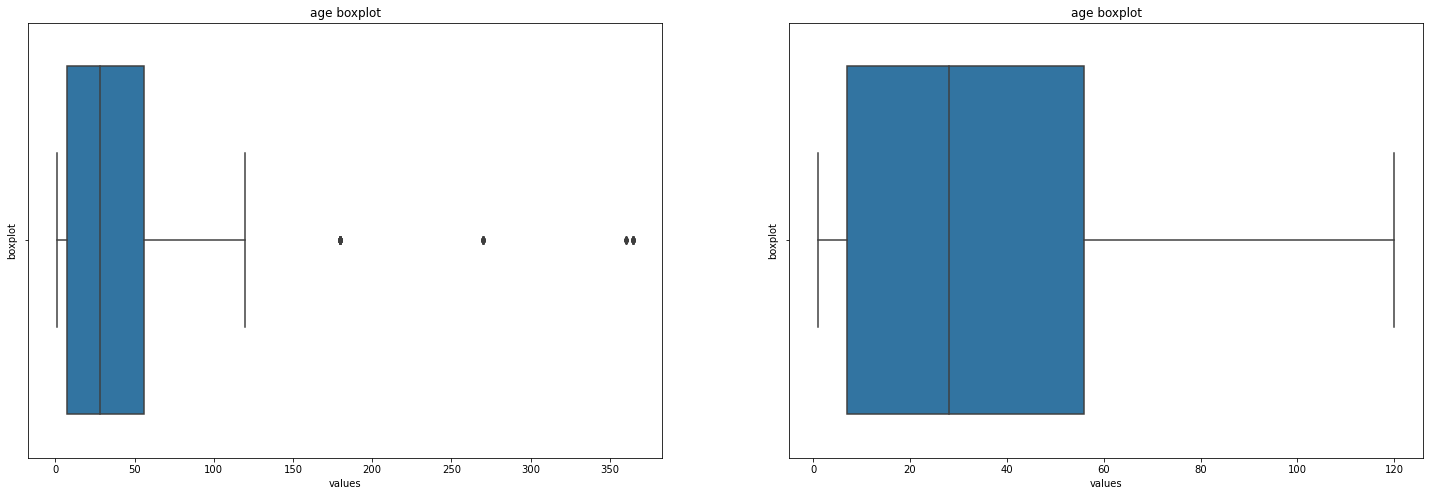

In [10]:
for col in df.drop('strength',axis=1).columns:
    odt_plots(df,col)

## Multivariate analysis using Regression

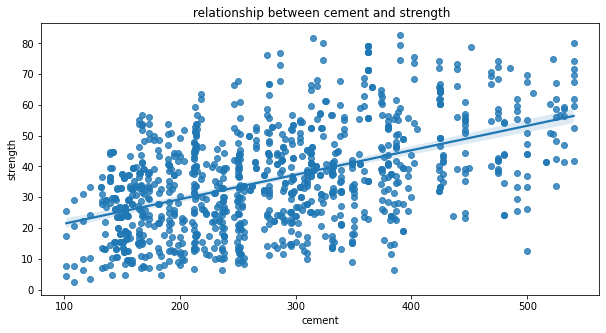

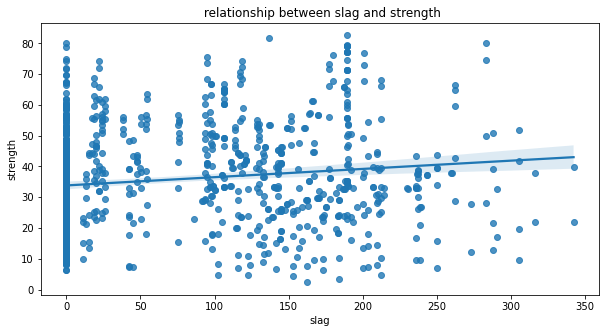

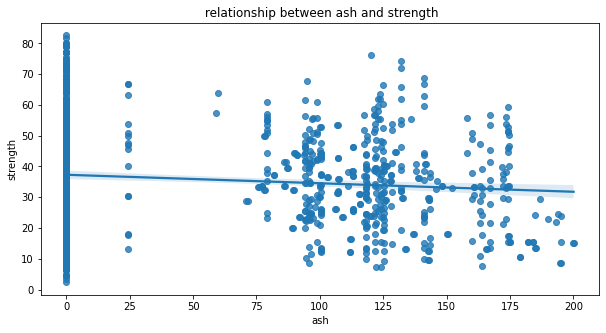

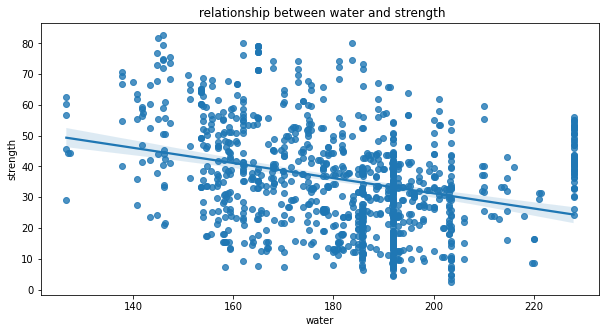

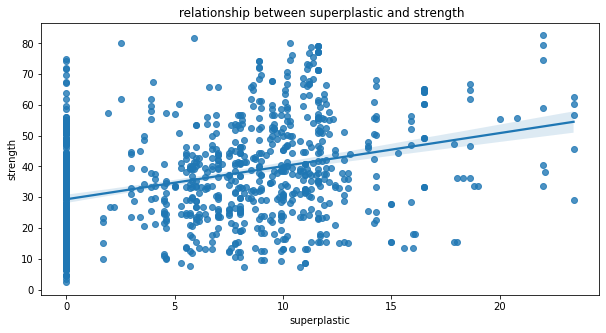

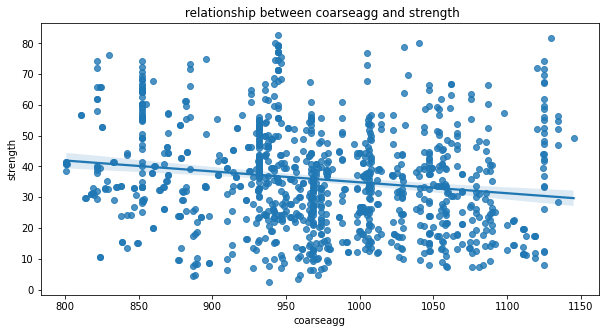

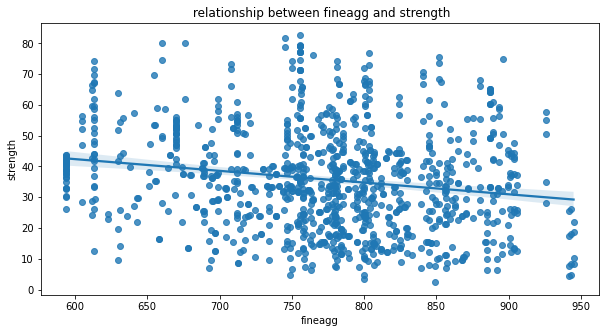

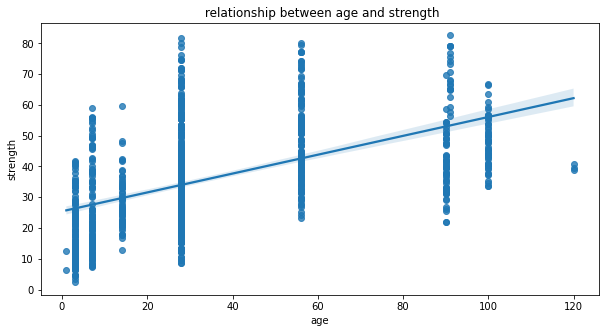

In [11]:
for col in df.columns:
    if col != 'strength':
        fig,ax1 = plt.subplots(figsize=(10,5))
        sns.regplot(x=df[col], y=df['strength'],ax=ax1).set_title(f' relationship between {col} and strength')

Analysis
1. cement and strength have a strong positive correlation.
2. slag and strength have a mild positive correlation. 
3. ash and strength have a mild negative correlation. 
4. water and strength have a strong negative correlation. 
5. superplastic and strength have a strong positive correlation. 
6. coarseagg and strength have a mild negative correlation. 
7. fineagg and strength have a mild negative correlation. 
8. age and strength have a strong positive correlation. 

## Multi-Colinearity Check
- Stage1 : Correaltion heatmap

<AxesSubplot:>

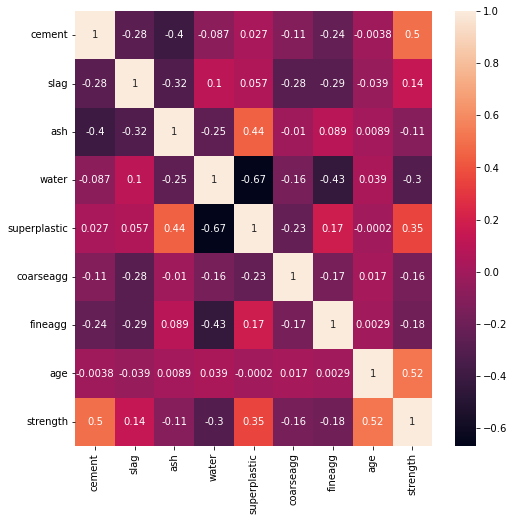

In [12]:
corr = df.corr() 
f,ax = plt.subplots(figsize =(8,8))
sns.heatmap(corr,annot=True)

Analysis :
independent variable pair with correlartion > 30% are listed below -
1. ash and superplastic .
2. cement and ash 
3. slag and ash
4. water and superplastic
5. water and finegg

Many inependent fetaures have colinearity > 30% which indicates that thereis chance of multi-colinearity.

## Multi-Colinearity test
- Stage 2 : Variane Inflating Factor(VIF)

  formula for VIF = 1/(1-R2)
    1. Regress every independent variable with each other and find the R2 score 
    2. find out VIF using above formula 
    3. if VIF is more than 5 for any independent variable we can conclude that multi-colinearity exist.

In [13]:
def VIF(independent_variables):
    vif = pd.DataFrame()
    vif['vif'] = [variance_inflation_factor(independent_variables.values,i) for i in range (independent_variables.shape[1])]
    vif = vif.sort_values(by=['vif'], ascending=False)
    vif['independent_variables'] = independent_variables.columns
    return vif

In [14]:
VIF(df.drop('strength',axis=1))

,vif,independent_variables
5,86.535959,cement
3,84.176659,slag
6,70.274934,ash
0,14.826526,water
4,5.980732,superplastic
2,4.486699,coarseagg
1,3.430770,fineagg
7,2.449118,age


Analysis :
- cement,water,superplastic,coarseagg and fineagg have VIF score > 5 so we can conclude that multi-collinearity exists.

##  Correlatiaon with Target Feature

In [15]:
def CWT(data,tcol):
    independent_variables = data.drop(tcol,axis=1).columns
    corr_result = []
    for col in independent_variables :
        corr_result.append(data[tcol].corr(data[col]))
    result = pd.DataFrame([independent_variables,corr_result],index=['independent variables','correlation']).T
    return result.sort_values(by='correlation',ascending = False)

In [16]:
CWT(df,'strength')

,independent variables,correlation
7,age,0.519136
0,cement,0.497832
4,superplastic,0.353588
1,slag,0.137201
2,ash,-0.105755
5,coarseagg,-0.164935
6,fineagg,-0.179536
3,water,-0.304172


Analysis:
- age,cement,Superplastic,water,fineagg have high correlation with strength

## Principal Component Analysis (PCA)

In [17]:
def PCA_1(x):
    n_comp = len(x.columns)
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    #Applying PCA
    for i in range(1,n_comp):
        pca = PCA(n_components=i)
        p_comp = pca.fit_transform(x)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i - 1] > 0.9:
            n_components = i
            break
    print('explained variance ratio after pca is:',evr)
    
    #Creating a PCA dataframe
    col = []
    for j in range(1,n_components+1):
        col.append('PC_'+str(j))
    pca_df = pd.DataFrame(p_comp,columns=col)
    return pca_df
        

In [18]:
transformed_df = PCA_1(df.drop('strength',axis = 1))

explained variance ratio after pca is: [0.27182784 0.44776951 0.61076485 0.73733075 0.86207842 0.97452865]


In [19]:
transformed_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,1.826467,1.284669,-1.306398,-0.071238,-0.534151,-0.790446
1,-1.870787,-0.595629,-1.096613,-1.296651,-0.129022,-0.489721
2,-0.749866,-0.463901,-0.525517,0.698966,-0.783847,0.672137
3,2.776191,0.585938,-0.467626,0.036635,0.034228,0.865712
4,0.907764,0.917339,-0.890205,-1.155748,0.415338,-1.133230
...,...,...,...,...,...,...
1025,-1.731743,0.003980,-1.539754,-0.026398,0.016544,1.020793
1026,-1.615369,-0.132366,3.418087,0.456733,-1.591638,0.297913
1027,-0.505268,1.293797,0.235763,0.108114,0.073852,0.754882
1028,2.694112,-0.308213,0.078722,0.841495,0.734884,1.093212


## Joining PCA Features with Target Feature

In [20]:
transformed_df = transformed_df.join(df['strength'],how='left')
transformed_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,strength
0,1.826467,1.284669,-1.306398,-0.071238,-0.534151,-0.790446,29.89
1,-1.870787,-0.595629,-1.096613,-1.296651,-0.129022,-0.489721,23.51
2,-0.749866,-0.463901,-0.525517,0.698966,-0.783847,0.672137,29.22
3,2.776191,0.585938,-0.467626,0.036635,0.034228,0.865712,45.85
4,0.907764,0.917339,-0.890205,-1.155748,0.415338,-1.133230,18.29


# Model Building
1. Using train test split
2. Cross Validation
3. Hyperparameter Tuning

In [21]:
def train_and_test_split(data,t_col,testsize=0.3):
    x = data.drop(t_col,axis=1)
    y = data[t_col]
    return train_test_split(x,y,test_size = testsize,random_state = 40)

In [22]:
def model_builder(model_name,estimator,data,t_col):
    x_train,x_test,y_train,y_test = train_and_test_split(data,t_col)
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test)
    result = r2_score(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    return [model_name,result,RMSE]

In [23]:
model_builder(model_name = 'Linear Regression',estimator = LinearRegression(),data = transformed_df,t_col = 'strength')

['Linear Regression', 0.7010986888256138, 9.005603000594654]

In [24]:
 def master_mb(x,y):
        list_model = [DecisionTreeRegressor(),Lasso(),Ridge(),SVR(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),XGBRegressor()]
        result = []
        model_names = [DecisionTreeRegressor,Lasso,Ridge,SVR,KNeighborsRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor]
        for model in list_model:
            temp_result = model_builder(model_name = type(model).__name__,estimator = model,data = x,t_col= y)
            result.append(temp_result)
        return result

In [25]:
master_mb(x = transformed_df, y = 'strength')

[['DecisionTreeRegressor', 0.6967438943476363, 9.070968618777595],
 ['Lasso', 0.6829583951739927, 9.274852604453656],
 ['Ridge', 0.701098085909134, 9.005612083230826],
 ['SVR', 0.6631621234399567, 9.56003204789118],
 ['KNeighborsRegressor', 0.7658891941200783, 7.970023789011611],
 ['AdaBoostRegressor', 0.6950067680929153, 9.096911899473731],
 ['GradientBoostingRegressor', 0.8060551628960385, 7.254174513892233],
 ['RandomForestRegressor', 0.8408379492877582, 6.5715626225746435],
 ['XGBRegressor', 0.849346172713737, 6.393504457623817]]

In [26]:
Master_MB = pd.DataFrame(master_mb(x = transformed_df, y = 'strength'),columns=['Model Names','R2_Score','RMSE']).sort_values(by=['R2_Score'],ascending = False)
Master_MB = Master_MB.reset_index(drop=True)
Master_MB

,Model Names,R2_Score,RMSE
0,XGBRegressor,0.849346,6.393504
1,RandomForestRegressor,0.836699,6.656452
2,GradientBoostingRegressor,0.806214,7.251199
3,KNeighborsRegressor,0.765889,7.970024
4,Ridge,0.701098,9.005612
5,DecisionTreeRegressor,0.696009,9.081957
6,AdaBoostRegressor,0.695003,9.096962
7,Lasso,0.682958,9.274853
8,SVR,0.663162,9.560032


### Cross Validation

In [27]:
def Kfoldcv(x,y,fold=10):
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_ls = cross_val_score(Lasso(),x,y,cv=fold)
    score_rg = cross_val_score(Ridge(),x,y,cv=fold)
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_kn = cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
    score_sv = cross_val_score(SVR(),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(),x,y,cv=fold)
    score_ab = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_gb = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_xg = cross_val_score(XGBRegressor(),x,y,cv=fold)   
    model_names = ['LinearRegression','Lasso','Ridge','DecisionTreeRegressor','KNeighborsRegressor','SVR','RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']
    scores = [score_lr,score_ls,score_rg,score_dt,score_kn,score_kn,score_sv,score_rf,score_ab,score_gb,score_xg]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_std]
        result.append(temp)
    kfold_df = pd.DataFrame(result,columns = ['model_names','cv_score','cv_std']).sort_values(by=['cv_score'], ascending=False)
    kfold_df = kfold_df.reset_index(drop=True)
    return kfold_df
        


In [28]:
Kfoldcv(transformed_df.drop('strength',axis = 1),transformed_df['strength'])

,model_names,cv_score,cv_std
0,AdaBoostRegressor,0.868011,0.034294
1,XGBRegressor,0.826008,0.030409
2,KNeighborsRegressor,0.799976,0.031226
3,SVR,0.799976,0.031226
4,DecisionTreeRegressor,0.758288,0.065583
5,RandomForestRegressor,0.725758,0.040625
6,Ridge,0.706597,0.046574
7,LinearRegression,0.706585,0.046654
8,GradientBoostingRegressor,0.703645,0.037573
9,Lasso,0.689706,0.036669


### HyperParameter Tuning

In [91]:
def tuning(x,y,fold = 10):
    
    # Parameter Grids for Different Models
    
    param_las = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_rd = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_dtr = {'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'max_depth':[3,5,7,9,11],'max_features':[1,2,3,4,5,6,7,'auto','log2','sqrt']}
    param_knr = {'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
    param_svr = {'gamma':['scale','auto'],'C':[0.1,1,1.5,2]}
    param_rf = {'max_depth':[3,5,7,9,11],'max_features':[1,2,3,4,5,6,7,'auto','log2','sqrt'],'n_estimators':[50,100,150,200]}
    param_ad = {'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.5,0.7,1,5,10,20,50,100]}
    param_gb = {'n_estimators':[50,100,150,200],'loss':['squared_error','absolute_error','huber','quantile']}
    param_xgb = {'eta':[0.1,0.5,0.7,1,5,10 ,20,50,100],'max_depth':[3,5,7,9,11],'gamma':[0,10,20,50,100],'reg_lambda':[0,1,3,5,7,10],'alpha':[0,1,3,5,7,10]}
    
    # Creating Model Object
    
    tune_las = RandomizedSearchCV(Lasso(),param_las,cv = fold)
    tune_rd = RandomizedSearchCV(Ridge(),param_rd,cv = fold)
    tune_dtr = RandomizedSearchCV(DecisionTreeRegressor(),param_dtr,cv = fold)
    tune_knr = RandomizedSearchCV(KNeighborsRegressor(),param_knr,cv = fold)
    tune_svr = RandomizedSearchCV(SVR(),param_svr,cv = fold)
    tune_rf = RandomizedSearchCV(RandomForestRegressor(),param_rf,cv = fold)
    tune_ad = RandomizedSearchCV(AdaBoostRegressor(),param_ad,cv = fold)
    tune_gb = RandomizedSearchCV(GradientBoostingRegressor(),param_gb,cv = fold)
    tune_xgb = RandomizedSearchCV(XGBRegressor(),param_xgb,cv = fold)
    
    # Model Fitting
    
    tune_las.fit(x,y)
    tune_rd.fit(x,y)
    tune_dtr.fit(x,y)
    tune_knr.fit(x,y)
    tune_svr.fit(x,y)
    tune_rf.fit(x,y)
    tune_ad.fit(x,y)
    tune_gb.fit(x,y)
    tune_xgb.fit(x,y)
    
    tune = [tune_las,tune_rd,tune_dtr,tune_knr,tune_svr,tune_rf,tune_ad,tune_gb,tune_xgb]
    #tune = [tune_knr,tune_ad,tune_xgb]
    models = ['Lasso','Ridge','Decision Tree Regressor','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    #models = ['KNN Regressor','AdaBoost Regressor','XGB Regressor']
    for i in range(len(tune)):
        print('Model :',models[i])
        print('Best Params :',tune[i].best_params_)
    

In [92]:
tuning(transformed_df.drop('strength',axis=1),transformed_df['strength'])

Model : Lasso
Best Params : {'alpha': 1e-05}
Model : Ridge
Best Params : {'alpha': 8}
Model : Decision Tree Regressor
Best Params : {'max_features': 3, 'max_depth': 7, 'criterion': 'squared_error'}
Model : K Neighbors Regressor
Best Params : {'weights': 'distance', 'algorithm': 'ball_tree'}
Model : SVR
Best Params : {'gamma': 'scale', 'C': 2}
Model : Random Forest Regressor
Best Params : {'n_estimators': 200, 'max_features': 4, 'max_depth': 9}
Model : AdaBoost Regressor
Best Params : {'n_estimators': 200, 'learning_rate': 1}
Model : Gradient Boost Regressor
Best Params : {'n_estimators': 150, 'loss': 'squared_error'}
Model : XGB Regressor
Best Params : {'reg_lambda': 7, 'max_depth': 9, 'gamma': 20, 'eta': 0.1, 'alpha': 7}


In [114]:
def CV_Post_HPT(x,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),x,y,cv = fold)
    score_las = cross_val_score(Lasso(alpha = 1e-05),x,y,cv = fold)
    score_drt = cross_val_score(DecisionTreeRegressor(criterion = 'squared_error',max_depth = 7,max_features = 3),x,y,cv = fold)
    score_rid = cross_val_score(Ridge(alpha = 8),x,y,cv = fold)
    score_knr = cross_val_score(KNeighborsRegressor(weights = 'distance',algorithm = 'ball_tree'),x,y,cv = fold)
    score_svr = cross_val_score(SVR(gamma = 'scale',C = 2),x,y,cv = fold)
    score_rfr = cross_val_score(RandomForestRegressor(max_depth = 9,max_features = 4,n_estimators = 200),x,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(n_estimators = 200,learning_rate = 1),x,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(n_estimators = 150,loss ='squared_error'),x,y,cv = fold)
    score_xgb = cross_val_score(XGBRegressor(eta =0.1,max_depth = 9,gamma = 20,reg_lambda = 7,alpha = 7),x,y,cv = fold)
    
    model_names = ['Linear Regression','Decision Tree Regressor','Lasso','Ridge','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    scores = [score_lr,score_las,score_drt,score_rid,score_knr,score_svr,score_rfr,score_ada,score_gb,score_xgb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_stdev = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_stdev]
        result.append(temp)
    KFold_df = pd.DataFrame(result,columns = ['Model Name','CV Score','CV Stdev']).sort_values(by = 'CV Score',ascending = False)  
    KFold_df = KFold_df.reset_index(drop=True)
    return KFold_df

In [115]:
CV_Post_HPT(transformed_df.drop('strength',axis = 1),transformed_df['strength'])

,Model Name,CV Score,CV Stdev
0,XGB Regressor,0.874462,0.025289
1,Random Forest Regressor,0.854559,0.033980
2,K Neighbors Regressor,0.853970,0.022661
3,Gradient Boost Regressor,0.840211,0.027463
4,SVR,0.779467,0.037533
5,AdaBoost Regressor,0.717755,0.036038
6,Ridge,0.706639,0.046023
7,Decision Tree Regressor,0.706585,0.046654
8,Linear Regression,0.706585,0.046654
9,Lasso,0.690770,0.071632


# Clustering
- Using Clustering to check if it can help us to improve Accuraccy

<AxesSubplot:xlabel='cement', ylabel='strength'>

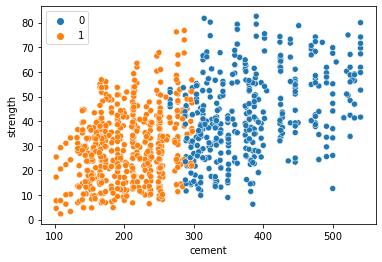

In [32]:
labels = KMeans(n_clusters=2,random_state=42)
cluster = labels.fit_predict(df.drop('strength',axis=1))
sns.scatterplot(x=df['cement'],y=df['strength'],hue = cluster)

In [33]:
def clustering(x,tcol,cluster):
    column = list(set(list(x.columns)) - set(list('strength')))
    #column = list(x.columns)
    R = int(len(column)/2) 
    if len(column) % 2 == 0:
        R = R
    else:
        R += 1
    f,ax = plt.subplots(R,2,figsize = (15,15))
    a = 0
    for row in range(R):
        for col in range(2):
            if a != len(column):
                ax[row][col].scatter(x[tcol],x[column[a]],c = cluster)
                ax[row][col].set_xlabel(tcol)
                ax[row][col].set_ylabel(column[a])
                a += 1 
            

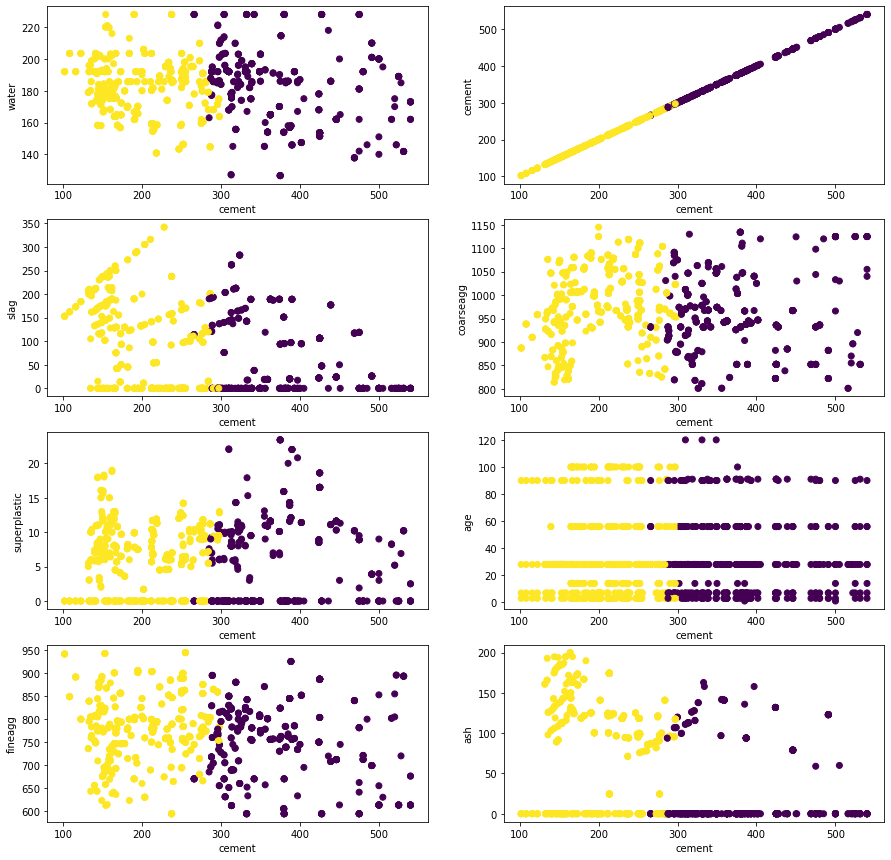

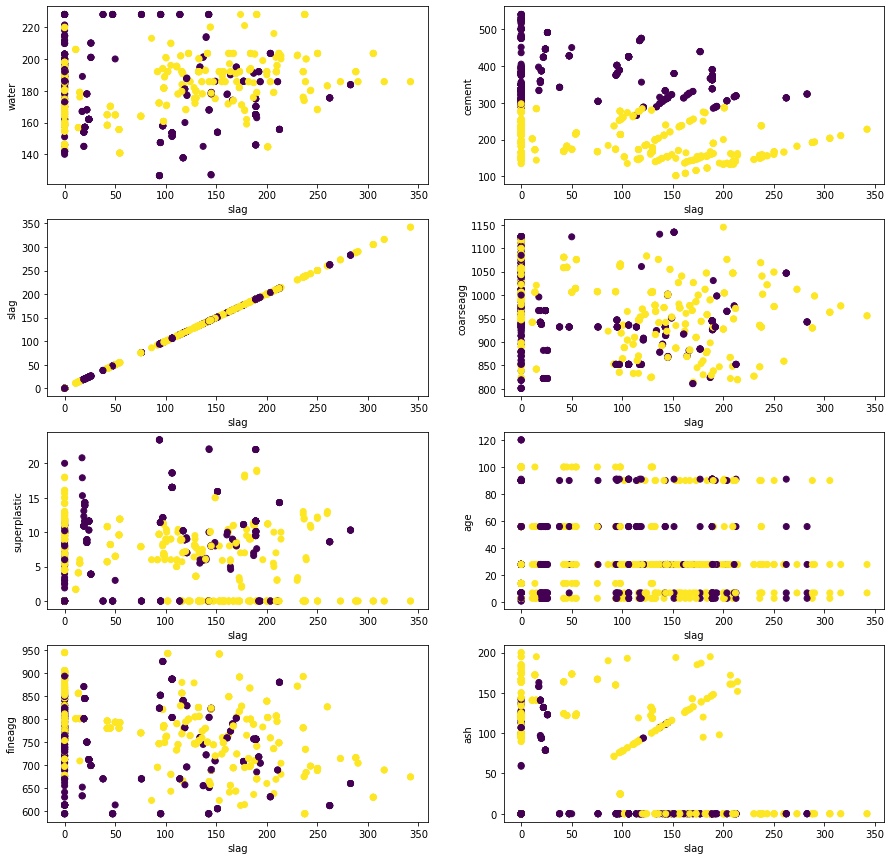

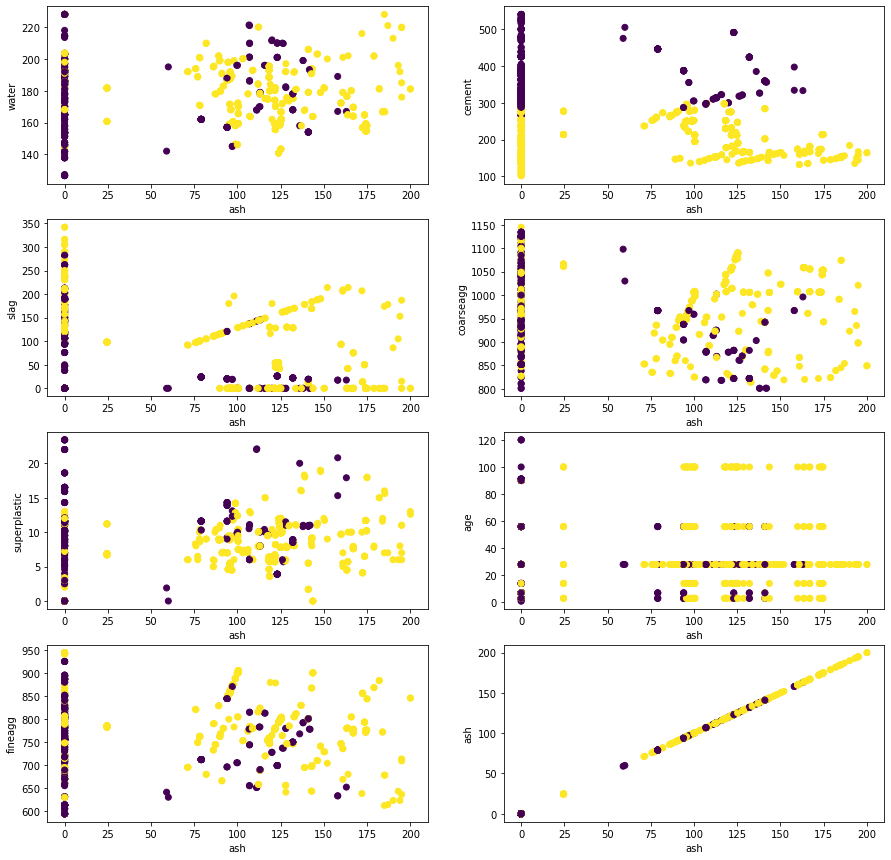

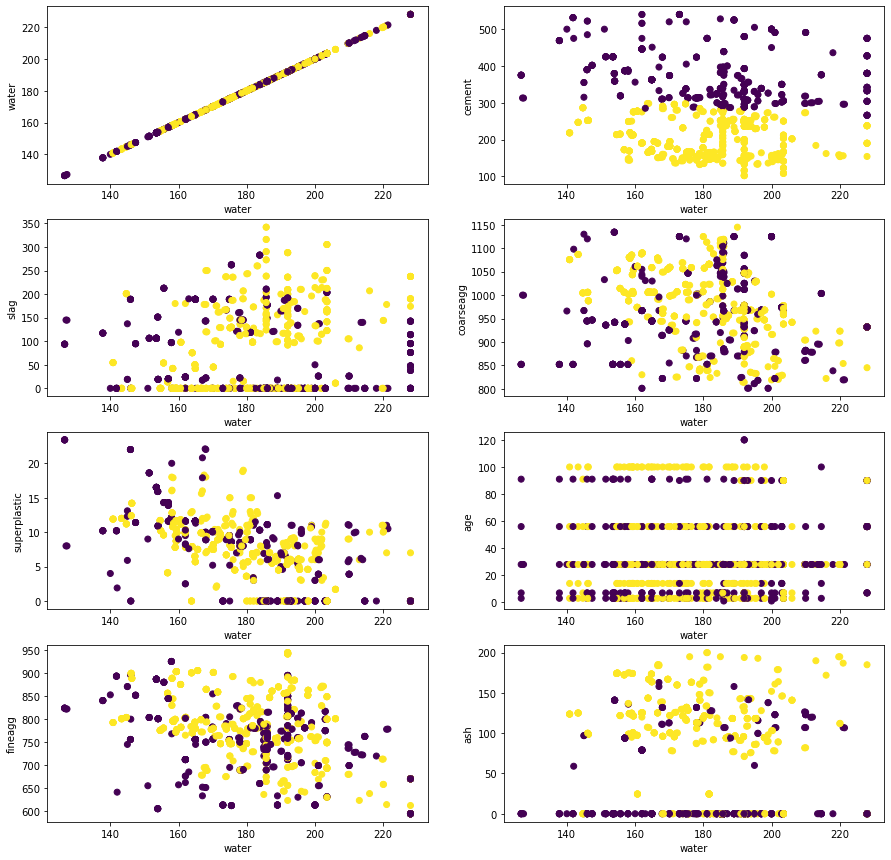

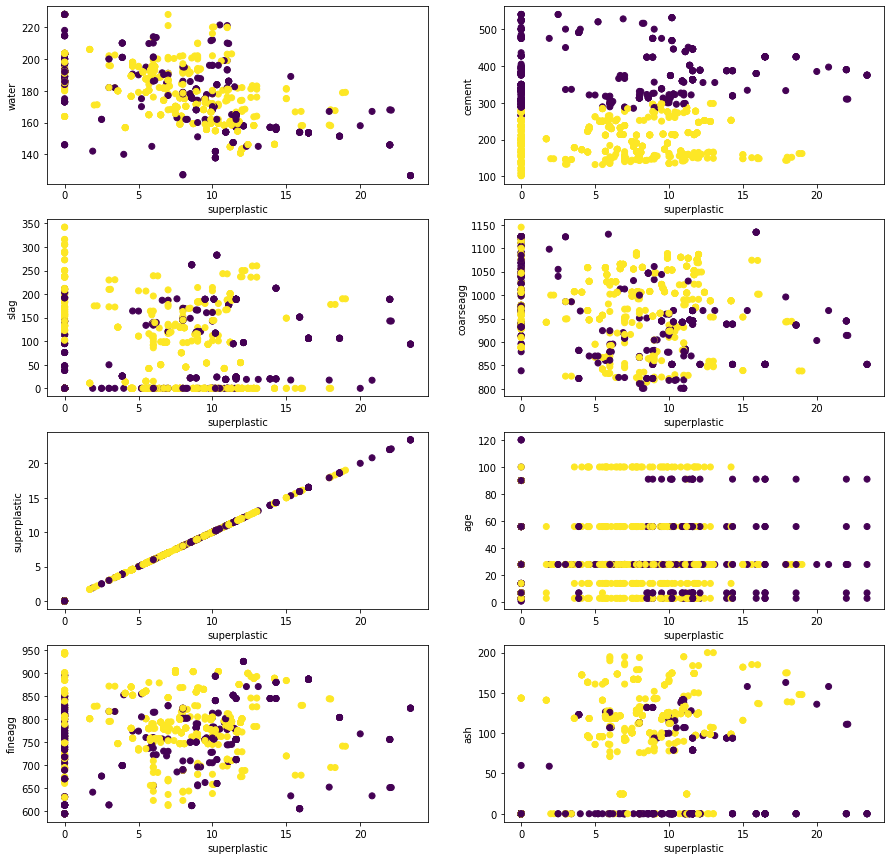

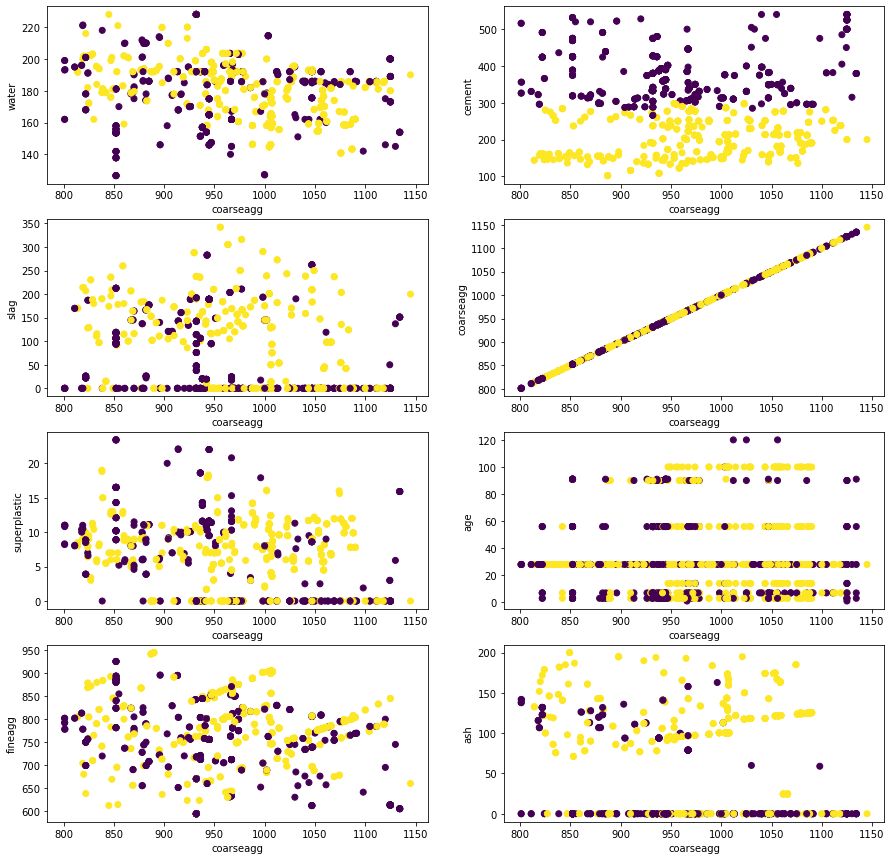

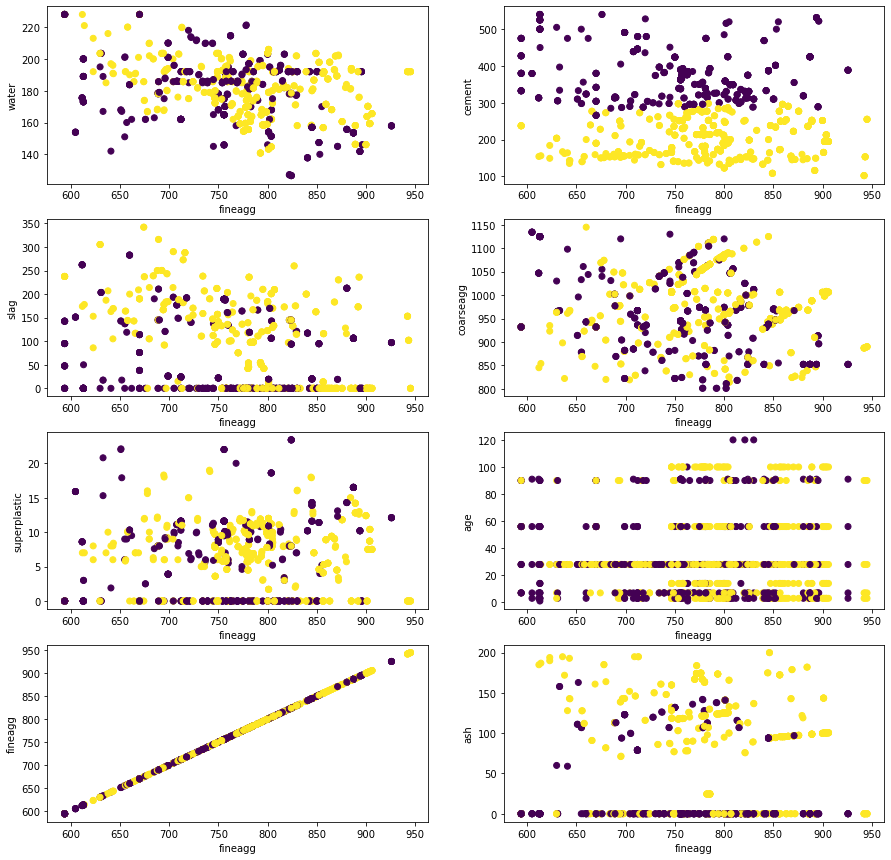

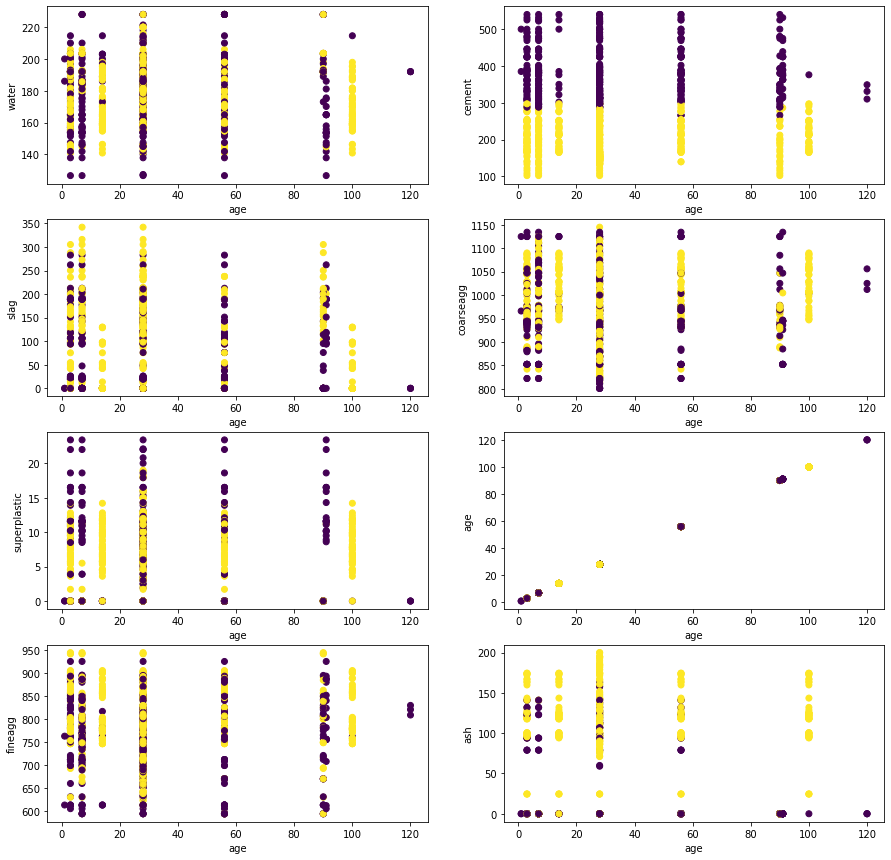

In [34]:
x = df.drop('strength',axis=1)
for col in x.columns:
    clustering(x,col,cluster)

Analysis
- Cement is forming clear cluster with all other independent variable

In [35]:
new_df = df.join(pd.DataFrame(cluster,columns=['cluster']), how = 'left')

In [36]:
new_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cluster
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,1
1026,531.3,0.0,0.0,141.8,10.2,852.1,893.7,3,41.30,0
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,56,55.06,0


In [37]:
new_f = new_df.groupby('cluster')['cement'].agg(['mean','median'])

In [38]:
new_f

,mean,median
cluster,,
0,378.191685,362.6
1,203.785864,202.0


In [39]:
cluster_df = new_df.merge(new_f, on = 'cluster', how = 'left')
cluster_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cluster,mean,median
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1,203.785864,202.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1,203.785864,202.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1,203.785864,202.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0,378.191685,362.6
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1,203.785864,202.0


### Model Evaluation On Cluster Dataset

In [40]:
Master_MB1 = pd.DataFrame(master_mb(cluster_df,'strength'),columns=['Model Names','R2_Score','RMSE']).sort_values(by=['R2_Score'],ascending = False)
Master_MB1 = Master_MB.reset_index(drop=True)
Master_MB1

,Model Names,R2_Score,RMSE
0,XGBRegressor,0.849346,6.393504
1,RandomForestRegressor,0.836699,6.656452
2,GradientBoostingRegressor,0.806214,7.251199
3,KNeighborsRegressor,0.765889,7.970024
4,Ridge,0.701098,9.005612
5,DecisionTreeRegressor,0.696009,9.081957
6,AdaBoostRegressor,0.695003,9.096962
7,Lasso,0.682958,9.274853
8,SVR,0.663162,9.560032


In [41]:
Kfoldcv(cluster_df.drop('strength',axis=1),cluster_df['strength'])

,model_names,cv_score,cv_std
0,AdaBoostRegressor,0.918926,0.024073
1,XGBRegressor,0.903231,0.019569
2,DecisionTreeRegressor,0.871358,0.042908
3,GradientBoostingRegressor,0.779082,0.033686
4,Ridge,0.736353,0.035023
5,LinearRegression,0.736273,0.034954
6,Lasso,0.736257,0.034576
7,KNeighborsRegressor,0.697235,0.060626
8,SVR,0.697235,0.060626
9,RandomForestRegressor,0.244477,0.045366


## Feature Importance

In [42]:
x_train,x_test,y_train,y_test = train_and_test_split(cluster_df,'strength')

In [43]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

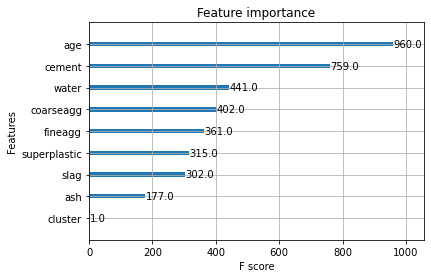

In [44]:
xgboost.plot_importance(xgb)

In [45]:
subset_df = cluster_df[['age','cement','water','coarseagg','fineagg','strength']]

In [116]:
CV_Post_HPT(subset_df.drop('strength',axis= 1),subset_df['strength'])

,Model Name,CV Score,CV Stdev
0,XGB Regressor,0.906820,0.021490
1,Gradient Boost Regressor,0.880663,0.023067
2,Random Forest Regressor,0.878052,0.027683
3,K Neighbors Regressor,0.773660,0.061886
4,Lasso,0.771713,0.046505
5,AdaBoost Regressor,0.735676,0.042275
6,Ridge,0.702798,0.038231
7,Decision Tree Regressor,0.702798,0.038232
8,Linear Regression,0.702798,0.038232
9,SVR,0.348765,0.048318


## Recursive Feature Elimination (RFE)

In [97]:
rfe_dfe = cluster_df
rfe = RFE(estimator= XGBRegressor())
rfe.fit(cluster_df.drop('strength',axis=1),cluster_df['strength'])
rfe.support_

array([ True,  True, False, False,  True, False, False,  True,  True,
       False, False])

In [99]:
cluster_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'cluster', 'mean', 'median'],
      dtype='object')

In [109]:
rfe_df = cluster_df[['cement','slag','superplastic','age','strength']]

In [117]:
CV_Post_HPT(rfe_df.drop('strength',axis= 1),subset_df['strength'])

,Model Name,CV Score,CV Stdev
0,XGB Regressor,0.908781,0.020423
1,Random Forest Regressor,0.889189,0.030490
2,Gradient Boost Regressor,0.887797,0.025605
3,K Neighbors Regressor,0.812345,0.040336
4,Lasso,0.811662,0.035260
5,AdaBoost Regressor,0.736780,0.031156
6,Ridge,0.704169,0.049578
7,Decision Tree Regressor,0.704169,0.049584
8,Linear Regression,0.704169,0.049584
9,SVR,0.602820,0.039403


# Learning Curve Analysis

In [68]:
def generatae_Learning_curve(model_name,estimator,x,y):
    train_size,train_score,test_score = learning_curve(estimator,x,y,cv=10)
    #print('train_size',train_size)
    #print('train_score',train_score)
    #print('test_score',test_score)
    train_score_maen = np.mean(train_score,axis=1)
    test_score_mean =  np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_maen,c = 'blue')
    plt.plot(train_size,test_score_mean,c = 'red')
    plt.xlabel('Samples')
    plt.ylabel('Score')
    plt.title("Learning")
    plt.title("Learning Curve for "+model_name)
    plt.legend('Training Accuracy','Tesing Accuracy')

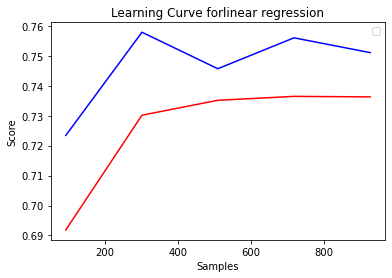

In [69]:
generatae_Learning_curve('linear regression',LinearRegression(),cluster_df.drop('strength',axis=1),cluster_df['strength'])

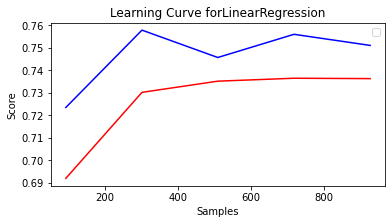

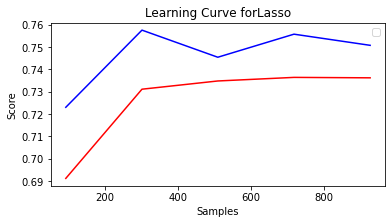

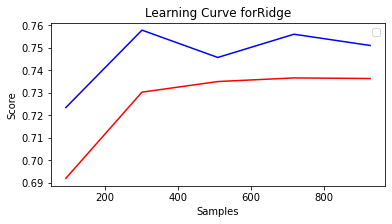

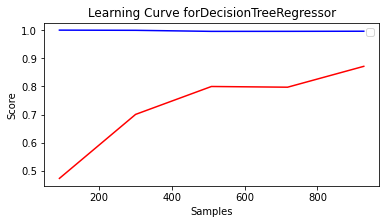

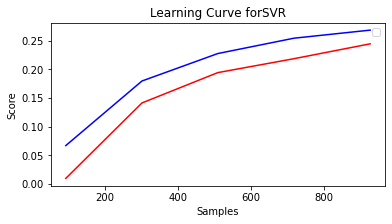

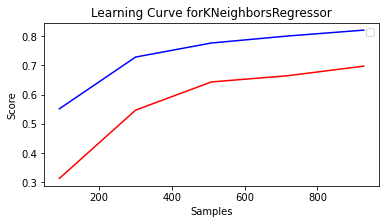

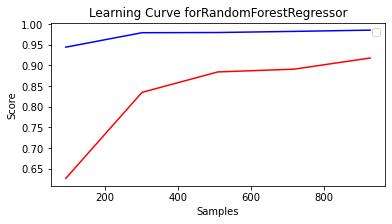

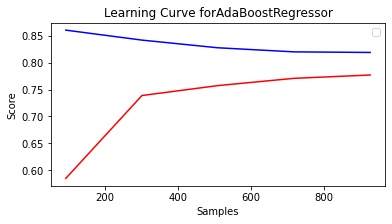

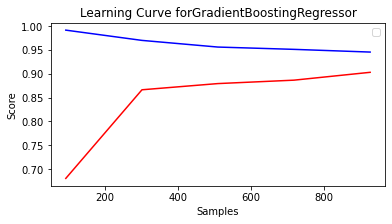

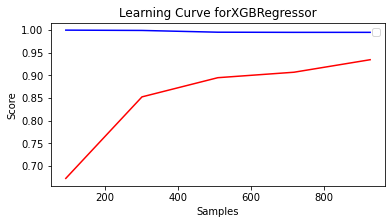

In [70]:
model_names = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]
for i,model in enumerate(model_names):
    fg = plt.figure(figsize=(6,3))
    ax = fig.add_subplot(5,2,i+1)
    generatae_Learning_curve(type(model).__name__,model,cluster_df.drop('strength',axis=1),cluster_df['strength'])

## Model prediction on Unseen Data

In [71]:
x_train,x_test,y_train,y_test = train_and_test_split(cluster_df,'strength',testsize=0.1)
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [72]:
x_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,cluster,mean,median
620,332.5,142.5,0.0,228.0,0.0,932.0,594.0,56,0,378.191685,362.6
656,295.7,0.0,95.6,171.5,8.9,955.1,859.2,28,1,203.785864,202.0
757,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,28,1,203.785864,202.0
767,313.3,145.0,0.0,178.5,8.0,1001.9,688.7,28,0,378.191685,362.6
781,296.0,0.0,106.7,221.4,10.5,819.2,778.4,28,0,378.191685,362.6


In [85]:
test_data = [[141,212,0,203,0,971,748,28,1,203.785864,202.0]]

In [84]:
labels.predict(test_data)

array([1])

In [86]:
model.predict(pd.DataFrame(test_data,columns=x_train.columns))

array([24.77208], dtype=float32)

In [82]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
